# 7 Sep 23 - Activity: Numerical Integration and More Lagrangians

Now that we have an idea how to find a wealth of interesting ordinary differential equations using Lagrangian mechanics, we'll work on building up ways to understand these equations, their solutions and behavior. The issue with this is that **most ODEs do not have analytical solutions**. That means we can't write down nice closed-form solutions for them using transcendental functions. However, don't despair, because that does not mean there is no solution. In fact, the vast majority of non-pathological ODEs one might come across in physics are **guaranteed** to have unique solutions (at least for finite time). We can easily calculate these solutions using **numerical integration**. Next week we'll also see how we can characterize the behavior of ODEs even without access to numerical integration.

## The Simple Harmonic Oscillator

Let's start simple with everyone's favorite differential equation, the simple harmonic oscillator. Recall that we can write the SHO as:

$$
\ddot{x} =  -\omega_0^2x
$$

where $\omega_0^2 = \frac{k}{m}$. This equation is 2nd order, but numerical integration techniques only work on 1st order equations. Thankfully they work on any number of potentially coupled 1st order equations. This means that with a quick change of variables, we can write the SHO as a system of 2 first order equations by introducing a new variable $v$ equal to the velocity of the oscillator.

$$
v = \dot{x}
$$

Then the acceleration of the oscillator can be written as:

$$
\dot{v}  = -\omega_0^2x
$$

This trick for writing higher order differential equations as first order equations is incredibly common. 

### Setting up to numerically integrate

We need a few things to numerically integrate using `solve_ivp` in python. First, we import the relevant libraries and functions.

In [13]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


**Note: The code in this block is not meant to be run directly, it is just a reference for the steps we need to take. Working code that is put together appears in the next cell.*

#### 1. Derivatives Function  

First, we need to set up a derivatives function that calculates and returns a list of the values of the first order derivatives given an input list of current values. These current values represent a location in **phase space**. As we will learn, [phase space](https://en.wikipedia.org/wiki/Phase_space) is a space that contains all the information about the state of an ODE. The simple harmonic oscillator has a 2D phase space since its state is totally defined by its position and velocity. 

Here's what our derivatives function looks like for a SHO:

```python
def diffyqs(t, curr_vals, omega2):
    # 2 first-order differential equations for a SHO
    # first 2 arguments are always t and curr_vals, which are followed by any parameters of your ODEs
    x, v = curr_vals   # unpack current values
    
    vdot = -omega2 * x # calculate derivative

    return v, vdot # return derivatives
```

We will pass this function to our solver, which will give us back integrated solutions of our list of derivatives. So since $v = \dot{x}$, our solution will return $x$ first, and $v$.

#### 2. Time Setup

We need to define the time span to solve the ODE for AND the specific times we'd like solution points for. Here it is also convienient to choose a time step $dt$. Here's one way we could do this in python:

```python
tmax = 15
dt = 0.1
tspan = (0, tmax)         # time span
t = np.arange(0, tmax, dt) # specific times to return solutions for
```


#### 3. Parameters and Initial Conditions

Since we're dealing with ODEs, we need to supply an initial condition to be able to solve. The SHO has 2D phase space so we need 2 values for our initial condition. We'll also define parameter value(s) in this step.

```python
omega2 = 2
initial_condition = [1, 0] # pull back 1m, no initial velocity
```

#### 4. Call Integrator

Now all we have left to do is to actually use `solve_ivp` to do the integration. The syntax for how to do this is shown below. We also get the opportunity to tell `solve_ivp` exactly what numerical integration method we'd like it to use. For now we can think of the integrator as a magic box and choose `RK45`, or a Runge-Kutta 4th order method. 

```python
solved = solve_ivp(diffyqs, tspan, initial_condition, t_eval = t, args = (omega2, ), method="RK45")
```

To access the solution directly, use `solved.y`. The variable `solved.y[0]` is the solved for position array and `solved.y[1]` is the velocity array in this case. Now let's see a full implementation of this below, including some visualization that compares our numerical solution to the analytical solution of the SHO.

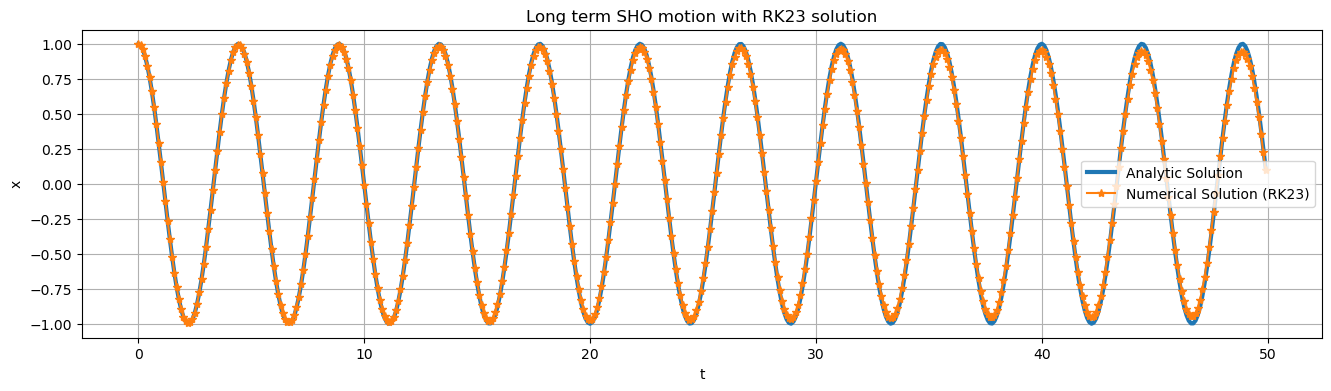

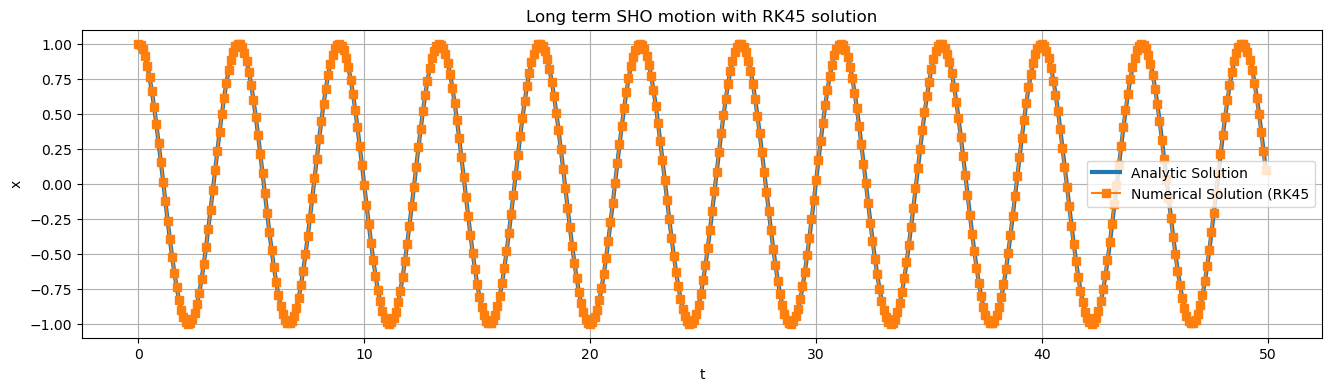

In [14]:
# 1. Derivatives Function
def diffyqs(t, curr_vals, omega2):
    x, v = curr_vals 
    vdot = -omega2 * x
    return v, vdot

# 2. Time Setup
tmax = 50
dt = 0.1
tspan = (0, tmax)
t = np.arange(0, tmax, dt)

# 3. Parameters and Initial Conditions
omega2 = 2
initial_condition = [1, 0] 

# 4. Call Integrator (note we can swamp them out, RK45 is the default)
RK23solved = solve_ivp(diffyqs, tspan, initial_condition, t_eval = t, args = (omega2,), method="RK23")
RK45solved = solve_ivp(diffyqs, tspan, initial_condition, t_eval = t, args = (omega2,), method="RK45")

# 5. Visualization and Comparison to analytical solution
def analytic_sol(t, omega0, initial_condition):
    x0, v0 = initial_condition
    return (v0/omega0)*np.sin(omega0*t) + x0 * np.cos(omega0*t)

plt.figure(figsize=(16, 4))
plt.plot(t, analytic_sol(t, omega2**0.5,initial_condition), label = "Analytic Solution", linewidth = 3)
plt.plot(t, RK23solved.y[0], label = "Numerical Solution (RK23)", marker='*')
plt.title("Long term SHO motion with RK23 solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()

plt.figure(figsize=(16,4))
plt.plot(t,analytic_sol(t, omega2**0.5,initial_condition), label = "Analytic Solution", linewidth = 3)
plt.plot(t,RK45solved.y[0], label = "Numerical Solution (RK45", marker='s')
plt.title("Long term SHO motion with RK45 solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()

## Group Activity

### Back to Paraboloid Paradise

[Analytical Solution (Finding ODEs for Paraboloid)](../../assets/notes/Notes-Bead_in_a_Paraboloid.pdf)

Let's consider the problem where a particle was constrained to move on the surface $z = c\rho^2$. The EOM we arrived at are complex
$$\ddot{\rho} = \dfrac{\rho\dot{\phi}^2 - 4c^2\rho\dot{\rho}^2 -2cg\rho}{1 + 4c^2\rho^2}$$
$$\ddot{\phi} = -2\frac{\dot{\rho}\dot{\phi}}{\rho} $$


**&#9989; Do this** 

Introduce variables $v$ and $\omega$ to use our trick for reducing $>1$ order differential equations to first order equations to write the equations of motion for this problem as a system of four first order differential equations (shown below). **You may set c=1, but keep it as a variable.**


$$\dot{\rho} = ?? $$

$$\dot{v} = ??$$ 

 <!-- \frac{1}{1 + 4r^2}(- 8rv^2 + r\omega^2 + 4rv^2 -2gr) -->
 <!-- (1/(1 + 4*r**2)) * (-4*v**2*r + r*omega**2 -2*g*r) -->
$$\dot{\phi} = ?? $$



$$\dot{\omega} = ??$$

<!-- -2\frac{v\omega}{r} -->
<!-- -2*v*omega/r -->

**&#9989; Do this** 

Use these equations to correct the `diffyqs` function in the cell below.


In [15]:
# 1. Derivatives Function
def diffyqs(t, curr_vals, g, c):

    r, v, theta, omega = curr_vals
    
    vdot = 0

    omegadot = 0

    return v, vdot, omega, omegadot # solution will return in this order, but integrated (r,v,theta,ω)

# 2. Time Setup
tmax = 40
dt = 0.01 # unneccecarily small dt to make plot super smooth
t = np.arange(0, tmax, dt)

# 3. Parameters and Initial Conditions
c = 1
g = 9.81
x0 = [2.6,0,0,2] 

# 4. Call Integrator
solved = solve_ivp(diffyqs, (0, tmax), x0, t_eval = t, args = (g, c, ), method="RK45")

**&#9989; Do this** 

1. Make r vs t and theta vs t plots of this trajectory. Can you think of what that trajectory would look like in cartesian coordinates? 2. Run the cell below to see what the trajectory looks like in 3D. How does the true trajectory compare to your prediction?
3. Change the initial condtion to examine the following cases and plot the trajectories in 3d:

    a. Particle starts from rest and is let go

    b. Particle starts at a given height and is given a low speed (less than needed to orbit)

    c. Particle starts at a given height and is given a low speed (more than needed to orbit)

    d. Can you find a flat horizontal circular orbit?



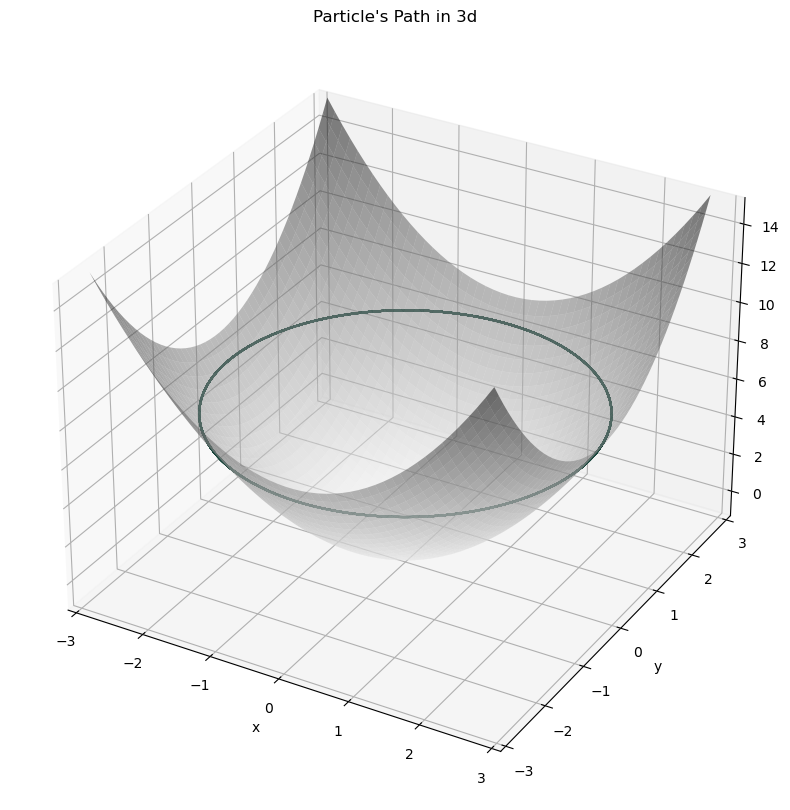

In [16]:
def parabaloid(x, y, alpha=1.):
    # function of a paraboloid in Cartesian coordinates
    return alpha * (x**2 + y**2)

def cylindrical_to_cartesian(r, th, alpha=1.):
    # convert back to cartesian coordinates for ease of plotting
    r = np.array(r)
    th = np.array(th)
    x = r*np.cos(th)
    y = r*np.sin(th)
    return x,y,parabaloid(x, y, alpha)

def plot_solution(solved):
    # Function to plot the trajectory 

    # points of the surface to plot
    x = np.linspace(-2.8, 2.8, 50)
    y = np.linspace(-2.8, 2.8, 50)
    alpha = c
    # construct meshgrid for plotting
    X, Y = np.meshgrid(x, y)
    Z = parabaloid(X, Y, alpha)

    # get trajectory in cartesian coords
    xtraj, ytraj, ztraj = cylindrical_to_cartesian(solved.y[0], solved.y[2], alpha)

    # plot plot plot
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    plt.title("Particle's Path in 3d")
    ax.plot_surface(X, Y, Z, cmap='binary', alpha=0.5) 
    ax.plot3D(xtraj, ytraj, ztraj, c = "#18453B")
    ax.set_xlim(-3, 3); ax.set_ylim(-3, 3); ax.set_zlim(-1 ,15)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

plot_solution(solved)